In [1]:
# Import packages 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.linear_model import LinearRegression
sns.set()

# Set global options 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 100
plt.style.use("seaborn-whitegrid")
sns.set_color_codes("muted")

In [2]:
df= pd.read_excel('E:/Data vizualation/Cuoi_ki/IE224_PhanTichDuLieu/dataset_giaxemaycu.xlsx')

In [3]:
# Xem số dòng, số cột
df.shape

(219, 17)

In [4]:
# Xem một số dòng đầu 
df.head()

,Hãng xe,Trọng lượng,Mã lực,Màu xe,Năm sản xuất,Dòng xe,Loại xe,Tên xe,Giá bán,Năm đăng ký,Tình trạng,Dung Tích,Xuất xứ,Số km đã đi,Chính sách bảo hành,Giấy tờ,Địa chỉ người bán
0,Yamaha,117,15.4,Đỏ,2018,Exciter,Côn tay,Yamaha Exciter 2018,16800000,2018,0.7,150,Việt Nam,30000,Hãng,Chính chủ,Bình Dương
1,Honda,110,11.6,Xanh,2018,Air Blade,Tay ga,Honda Air Blade 2018,26500000,2018,0.6,125,Nhật Bản,7979,Hãng,Chính chủ,Đắk Lắk
2,Yamaha,99,8.8,Đen,2018,Sirius,Xe số,Yamaha Sirius 2018,9800000,2018,0.6,115,Việt Nam,20000,Hãng,Chính chủ,Cần Thơ
3,Yamaha,99,8.1,Xanh,2016,Grande,Tay ga,Yamaha Grande 2016,19500000,2016,0.6,125,Việt Nam,20000,Hãng,Chính chủ,Hà Nội
4,Honda,97,8.8,Trắng,2020,Vision,Tay ga,Honda Vision Smarkey 2020,25500000,2020,0.85,110,Việt Nam,10000,Hãng,Chính chủ,Hà Nội


In [5]:
# Xem một số dòng cuối để chắc rằng dữ liệu là đồng nhấu 
df.tail(4)

,Hãng xe,Trọng lượng,Mã lực,Màu xe,Năm sản xuất,Dòng xe,Loại xe,Tên xe,Giá bán,Năm đăng ký,Tình trạng,Dung Tích,Xuất xứ,Số km đã đi,Chính sách bảo hành,Giấy tờ,Địa chỉ người bán
215,Yamaha,116,15.4,Xám,2022,NVX,Tay ga,Yamaha NVX 155,38800000,2022,0.8,155,Nhật Bản,2300,Hãng,Chính chủ,Hà Nội
216,Honda,130,14.4,Vàng,2015,PCX,Tay ga,Honda PCX 150,21500000,2015,0.6,157,Việt Nam,76000,Hết thời hạn,Chính chủ,Đà Nẵng
217,Honda,96,8.8,Đỏ,2022,Vision,Tay ga,Honda Vision 2022,30500000,2022,0.85,110,Nhật Bản,4000,Hãng,Chính chủ,Đà Nẵng
218,Piaggio,116,11.7,Trắng,2015,Liberty,Tay ga,Piaggio Liberty 2015,5800000,2015,0.8,124.5,Việt Nam,20000,Hết thời hạn,Không chính chủ,Hà Nội


** COMMENT **
- Dataset về xe máy cũ
- Gồm 219 rows và 17 columns
- 

## 1. DATA CLEANING
+ Xác định và xử lý dữ liệu thiếu.
+ Đổi tên các cột để đảm bảo tính nhất quán và dễ đọc.
+ Chuyển đổi dữ liệu thành các định dạng phù hợp (ví dụ: từ object sang numeric).

#### Chuẩn hóa tên cột 
    - Viết thường
    - Thay thế khoảng trắng bằng dấu _

In [6]:
# View column's names
df.columns.to_list()

['Hãng xe',
 'Trọng lượng',
 'Mã lực',
 'Màu xe',
 'Năm sản xuất',
 'Dòng xe',
 'Loại xe',
 'Tên xe',
 'Giá bán',
 'Năm đăng ký',
 'Tình trạng',
 'Dung Tích',
 'Xuất xứ',
 'Số km đã đi',
 'Chính sách bảo hành',
 'Giấy tờ',
 'Địa chỉ người bán']

In [7]:
import re

#Standardize column names 
df.columns = [re.sub("[ -]", "_", c).lower().strip() for c in df.columns]

In [8]:
# Check result
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,Yamaha,117,15.4,Đỏ,2018,Exciter,Côn tay,Yamaha Exciter 2018,16800000,2018,0.7,150,Việt Nam,30000,Hãng,Chính chủ,Bình Dương
1,Honda,110,11.6,Xanh,2018,Air Blade,Tay ga,Honda Air Blade 2018,26500000,2018,0.6,125,Nhật Bản,7979,Hãng,Chính chủ,Đắk Lắk
2,Yamaha,99,8.8,Đen,2018,Sirius,Xe số,Yamaha Sirius 2018,9800000,2018,0.6,115,Việt Nam,20000,Hãng,Chính chủ,Cần Thơ
3,Yamaha,99,8.1,Xanh,2016,Grande,Tay ga,Yamaha Grande 2016,19500000,2016,0.6,125,Việt Nam,20000,Hãng,Chính chủ,Hà Nội
4,Honda,97,8.8,Trắng,2020,Vision,Tay ga,Honda Vision Smarkey 2020,25500000,2020,0.85,110,Việt Nam,10000,Hãng,Chính chủ,Hà Nội


In [9]:
# Chuẩn hóa lại cột giá bán để dễ đọc
df['giá_bán'] = df['giá_bán'] / 1000000  # Chia cho 1 000 000 để đổi đơn vị ( ví dụ 16 800 000 thành 16.8)

In [10]:
# Các biến phân loại
categorical_columns = ['hãng_xe', 'màu_xe', 'loại_xe', 'xuất_xứ', 
                       'chính_sách_bảo_hành', 'giấy_tờ', 'dòng_xe', 
                      'địa_chỉ_người_bán']
columns_to_normalize =categorical_columns

In [11]:
# Chuẩn hóa dữ liệu các biến phân loại bằng cách loại bỏ khoảng trắng thừa và chuyển đổi về chữ thường
for column in categorical_columns:
    df[column] = df[column].str.strip().str.lower()

# Kiểm tra các giá trị duy nhất sau khi chuẩn hóa
unique_values = {column: df[column].unique() for column in categorical_columns}
unique_values

{'hãng_xe': array(['yamaha', 'honda', 'sym', 'piaggio', 'kawasaki', 'suzuki', 'gpx'],
       dtype=object),
 'màu_xe': array(['đỏ', 'xanh', 'đen', 'trắng', 'xám', 'vàng', 'trắng', 'đồng',
        'đỏ', 'vàng', 'ghi', 'kem', 'cam', 'nâu', 'hồng'], dtype=object),
 'loại_xe': array(['côn tay', 'tay ga', 'xe số'], dtype=object),
 'xuất_xứ': array(['việt nam', 'nhật bản', '?', 'thái lan', 'singapore', 'ý',
        'đài loan', 'hàn quốc', 'mỹ', 'nhật bản', 'việt nam'],
       dtype=object),
 'chính_sách_bảo_hành': array(['hãng', 'hết thời hạn', '?', 'hãng'], dtype=object),
 'giấy_tờ': array(['chính chủ', 'không chính chủ', 'chính chủ', '?',
        'không chính chủ'], dtype=object),
 'dòng_xe': array(['exciter', 'air blade', 'sirius', 'grande', 'vision', 'sh',
        'vario', 'galaxy', 'vespa', 'shi', 'w175', 'mt', 'winner',
        'raider', 'jupiter', 'future', 'sprint', 'lead', 'janus',
        'winner x', 'wave', 'sonic', 'demon 150gr', 'gts', 'satria',
        'wave a', 

In [12]:
# Tiếp tục chuẩn hóa dữ liệu bằng cách xử lý các biến thể khác nhau của cùng một giá trị
# Ví dụ: 'trắng' và 'trắng' hoặc 'hãng' và 'hãng'
# Từ điển thay thế cho các giá trị có cách viết khác nhau nhưng cùng một ý nghĩa
replacement_dict = {
    'màu_xe': {
        'trắng': 'trắng',
        'đỏ': 'đỏ',
        'vàng': 'vàng',
    },
    'xuất_xứ': {
        'nhật bản': 'nhật bản',
        'việt nam': 'việt nam',
    },
    'chính_sách_bảo_hành': {
        'hãng': 'hãng',
    },
    'giấy_tờ': {
        'chính chủ': 'chính chủ',
        'không chính chủ': 'không chính chủ',
    },
    'địa_chỉ_người_bán': {
        'hồ chí minh': 'hồ chí minh',
        'bình dương': 'bình dương',
        'đồng nai': 'đồng nai',
        'đà nẵng': 'đà nẵng',
        'bình định': 'bình định',
        'bình thuận': 'bình thuận',
        'tiền giang': 'tiền giang',
        'cà mau': 'cà mau',
        'bến tre': 'bến tre',
        'vũng tàu': 'bà rịa - vũng tàu',
         'đòng nai': 'đồng nai',
         'lâm đòng': 'lâm đồng',
         'đồng tháp': 'đồng tháp',
         'bến tre': 'bế́n tre'
    },
    'dòng_xe': {
        'air blade':'air blade',
        'blade': 'blade',
        'cub': 'cub',
        'demon 150gr':'demon 150gr',
        'elegant': 'elegant',
        'elizabeth':'elizabeth',
        'exciter':'exciter',
        'future':'future',
        'galaxy':'galaxy',
        'grande':'grande',
        'gsx':'gsx',
        'gts':'gts',
        'janus':'janus',
        'jupiter':'jupiter',
        'lead':'lead',
        'liberty':'liberty',
        'mt':'mt',
        'naked bike':'naked bike',
        'nvx':'nvx',
        'pcx':'pcx',
        'primavera':'primavera',
        'raider':'raider',
        'satria':'satria',
        'scr':'scr',
        'sh':'sh',
        'sh mode':'sh mode',
        'shi':'shi',
        'sirius':'sirius',
        'sonic':'sonic',
        'sprint':'sprint',
        'tfx':'tfx',
        'vario':'vario',
        'vespa':'vespa',
        'vision':'vision',
        'w175':'w175',
        'wave':'wave',
        'wave a':'wave a',
        'winner':'winner',
        'winner x':'winner x',
    },
}
# Áp dụng việc thay thế
for column, replace_dict in replacement_dict.items():
    df[column] = df[column].replace(replace_dict)
# Kiểm tra lại các giá trị duy nhất sau khi chuẩn hóa
unique_values_after = {column: df[column].unique() for column in columns_to_normalize}
unique_values_after

{'hãng_xe': array(['yamaha', 'honda', 'sym', 'piaggio', 'kawasaki', 'suzuki', 'gpx'],
       dtype=object),
 'màu_xe': array(['đỏ', 'xanh', 'đen', 'trắng', 'xám', 'vàng', 'đồng', 'ghi',
        'kem', 'cam', 'nâu', 'hồng'], dtype=object),
 'loại_xe': array(['côn tay', 'tay ga', 'xe số'], dtype=object),
 'xuất_xứ': array(['việt nam', 'nhật bản', '?', 'thái lan', 'singapore', 'ý',
        'đài loan', 'hàn quốc', 'mỹ'], dtype=object),
 'chính_sách_bảo_hành': array(['hãng', 'hết thời hạn', '?'], dtype=object),
 'giấy_tờ': array(['chính chủ', 'không chính chủ', '?'], dtype=object),
 'dòng_xe': array(['exciter', 'air blade', 'sirius', 'grande', 'vision', 'sh',
        'vario', 'galaxy', 'vespa', 'shi', 'w175', 'mt', 'winner',
        'raider', 'jupiter', 'future', 'sprint', 'lead', 'janus',
        'winner x', 'wave', 'sonic', 'demon 150gr', 'gts', 'satria',
        'wave a', 'nvx', 'cub', 'liberty', 'sh mode', 'gsx', 'blade', '?',
        'elizabeth', 'naked bike', 'tfx', 'scr', 'pri

In [13]:
#Check
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,yamaha,117,15.4,đỏ,2018,exciter,côn tay,Yamaha Exciter 2018,16.8,2018,0.7,150,việt nam,30000,hãng,chính chủ,bình dương
1,honda,110,11.6,xanh,2018,air blade,tay ga,Honda Air Blade 2018,26.5,2018,0.6,125,nhật bản,7979,hãng,chính chủ,đắk lắk
2,yamaha,99,8.8,đen,2018,sirius,xe số,Yamaha Sirius 2018,9.8,2018,0.6,115,việt nam,20000,hãng,chính chủ,cần thơ
3,yamaha,99,8.1,xanh,2016,grande,tay ga,Yamaha Grande 2016,19.5,2016,0.6,125,việt nam,20000,hãng,chính chủ,hà nội
4,honda,97,8.8,trắng,2020,vision,tay ga,Honda Vision Smarkey 2020,25.5,2020,0.85,110,việt nam,10000,hãng,chính chủ,hà nội


In [14]:
# Replace '?' thành NaN
df = df.replace('?', np.nan)

In [15]:
# Checking missing data
missing_data = df.isnull().sum()
print(missing_data)

hãng_xe                 0
trọng_lượng             2
mã_lực                  8
màu_xe                  0
năm_sản_xuất            0
dòng_xe                 1
loại_xe                 0
tên_xe                  0
giá_bán                 0
năm_đăng_ký             0
tình_trạng              2
dung_tích               3
xuất_xứ                29
số_km_đã_đi             6
chính_sách_bảo_hành     1
giấy_tờ               6
địa_chỉ_người_bán       0
dtype: int64


In [16]:
# % giá trị bị thiếu
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

hãng_xe                 0.000000
trọng_lượng             0.913242
mã_lực                  3.652968
màu_xe                  0.000000
năm_sản_xuất            0.000000
dòng_xe                 0.456621
loại_xe                 0.000000
tên_xe                  0.000000
giá_bán                 0.000000
năm_đăng_ký             0.000000
tình_trạng              0.913242
dung_tích               1.369863
xuất_xứ                13.242009
số_km_đã_đi             2.739726
chính_sách_bảo_hành     0.456621
giấy_tờ               2.739726
địa_chỉ_người_bán       0.000000
dtype: float64


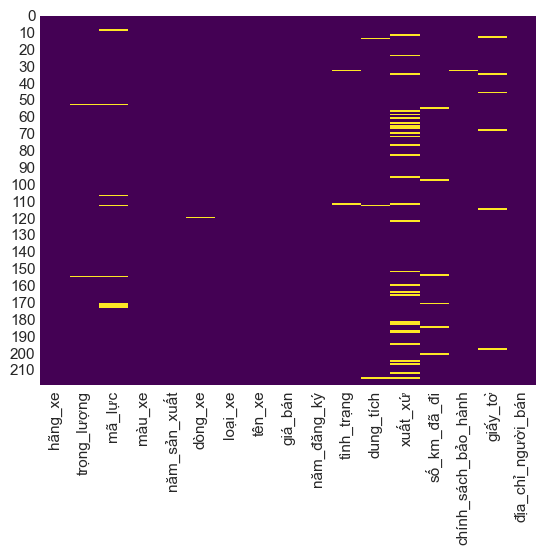

In [17]:
# Trực quan hóa missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

# nhận xét : Giá trị missing nằm nhiều nhất ở column 'xuất_xứ' và 'địa_chỉ_người_bán'

In [18]:
# Chuyển đổi thành numeric cho một số cột
df['số_km_đã_đi'] = pd.to_numeric(df['số_km_đã_đi'])
df['dung_tích'] = pd.to_numeric(df['dung_tích'])
df['mã_lực'] = pd.to_numeric(df['mã_lực'])
df['trọng_lượng'] = pd.to_numeric(df['trọng_lượng'])
df['tình_trạng'] = pd.to_numeric(df['tình_trạng'])

In [19]:
# Thay thế giá trị thiếu trong các biến số trong bằng giá trị trung bình
df['số_km_đã_đi'].fillna(df['số_km_đã_đi'].mean(), inplace=True)
df['dung_tích'].fillna(df['dung_tích'].mean(), inplace=True)
df['mã_lực'].fillna(df['mã_lực'].mean(), inplace=True)
df['trọng_lượng'].fillna(df['trọng_lượng'].mean(), inplace=True)
df['tình_trạng'].fillna(df['tình_trạng'].mean(), inplace=True)

In [20]:
# Thay thế mising biến phân loại
for column in ['xuất_xứ', 'chính_sách_bảo_hành', 'giấy_tờ', 'dòng_xe']:
    mode_value = df[column].mode()[0]  
    df[column].fillna(mode_value, inplace=True)

In [21]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hãng_xe              219 non-null    object 
 1   trọng_lượng          219 non-null    float64
 2   mã_lực               219 non-null    float64
 3   màu_xe               219 non-null    object 
 4   năm_sản_xuất         219 non-null    int64  
 5   dòng_xe              219 non-null    object 
 6   loại_xe              219 non-null    object 
 7   tên_xe               219 non-null    object 
 8   giá_bán              219 non-null    float64
 9   năm_đăng_ký          219 non-null    int64  
 10  tình_trạng           219 non-null    float64
 11  dung_tích            219 non-null    float64
 12  xuất_xứ              219 non-null    object 
 13  số_km_đã_đi          219 non-null    float64
 14  chính_sách_bảo_hành  219 non-null    object 
 15  giấy_tờ            219 non-null    obj

In [22]:
df.describe()

,trọng_lượng,mã_lực,năm_sản_xuất,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,số_km_đã_đi
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,111.832719,11.773365,2017.885845,30.659854,2017.972603,0.769954,134.704815,14320.600939
std,13.455775,4.022240,4.346329,29.127444,4.356707,0.513641,35.529994,17832.388825
min,81.000000,2.780000,1987.000000,1.700000,1987.000000,0.300000,49.950000,1.000000
25%,100.000000,8.895000,2016.000000,14.850000,2016.000000,0.600000,119.450000,3342.500000
50%,112.000000,11.200000,2019.000000,23.500000,2019.000000,0.750000,125.000000,10000.000000
75%,117.000000,14.450000,2021.000000,36.000000,2021.000000,0.900000,150.000000,20000.000000
max,172.000000,38.000000,2023.000000,299.000000,2023.000000,8.000000,329.600000,200000.000000


# 2. EDA
+ Thống kê mô tả cơ bản (mean, median, ..).
+ Phân tích phân bố của các biến (với histograms, boxplots).
+ Tìm hiểu mối quan hệ giữa các biến (correlation matrix, scatter plots).

### Mean 

In [23]:
mean_gia_ban = df['giá_bán'].mean()
mean_so_km_da_di = df['số_km_đã_đi'].mean()
mean_dung_tich = df['dung_tích'].mean()
mean_ma_luc = df['mã_lực'].mean()
mean_trong_luong = df['trọng_lượng'].mean()
mean_tinh_trang = df['tình_trạng'].mean()

print("Trung bình giá bán:", mean_gia_ban)
print("Trung bình số km đã đi:", mean_so_km_da_di)
print("Trung bình dung tích:", mean_dung_tich)
print("Trung bình mã lực:", mean_ma_luc)
print("Trung bình trọng lượng:", mean_trong_luong)
print("Trung bình tình trạng:", mean_tinh_trang)


Trung bình giá bán: 30.65985387671233
Trung bình số km đã đi: 14320.600938967136
Trung bình dung tích: 134.70481481481482
Trung bình mã lực: 11.773364928909952
Trung bình trọng lượng: 111.83271889400922
Trung bình tình trạng: 0.7699539170506912


### Median

In [24]:
median_gia_ban = df['giá_bán'].median()
median_so_km_da_di = df['số_km_đã_đi'].median()
median_dung_tich = df['dung_tích'].median()
median_ma_luc = df['mã_lực'].median()
median_trong_luong = df['trọng_lượng'].median()

print("Trung vị giá bán:", median_gia_ban)
print("Trung vị số km đã đi:", median_so_km_da_di)
print("Trung vị dung tích:", median_dung_tich)
print("Trung vị mã lực:", median_ma_luc)
print("Trung vị trọng lượng:", median_trong_luong)


Trung vị giá bán: 23.5
Trung vị số km đã đi: 10000.0
Trung vị dung tích: 125.0
Trung vị mã lực: 11.2
Trung vị trọng lượng: 112.0


### Mode

In [25]:
mode_gia_ban = df['giá_bán'].mode()
mode_so_km_da_di = df['số_km_đã_đi'].mode()
mode_dung_tich = df['dung_tích'].mode()
mode_ma_luc = df['mã_lực'].mode()
mode_trong_luong = df['trọng_lượng'].mode()

print("Mode giá bán:", mode_gia_ban)
print("Mode số km đã đi:", mode_so_km_da_di)
print("Mode dung tích:", mode_dung_tich)
print("Mode mã lực:", mode_ma_luc)
print("Mode trọng lượng:", mode_trong_luong)


Mode giá bán: 0    23.5
Name: giá_bán, dtype: float64
Mode số km đã đi: 0    10000.0
1    20000.0
Name: số_km_đã_đi, dtype: float64
Mode dung tích: 0    125.0
Name: dung_tích, dtype: float64
Mode mã lực: 0    15.4
Name: mã_lực, dtype: float64
Mode trọng lượng: 0    113.0
Name: trọng_lượng, dtype: float64


### Histogram

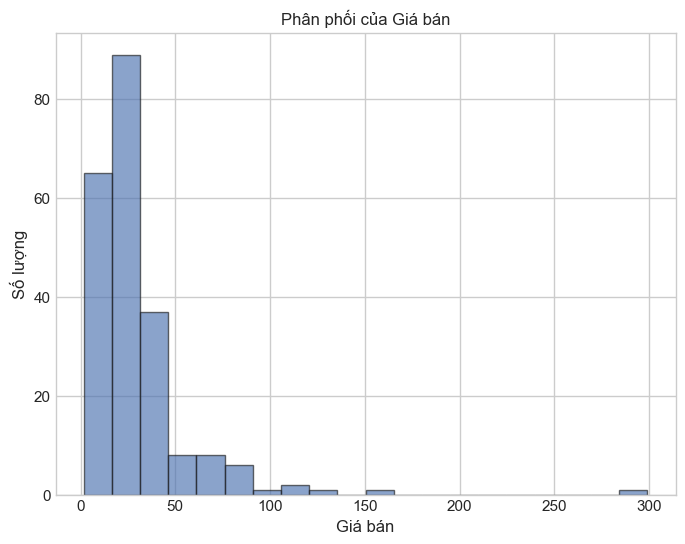

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['giá_bán'], bins=20, edgecolor='k', alpha=0.65)
plt.xlabel('Giá bán')
plt.ylabel('Số lượng')
plt.title('Phân phối của Giá bán')
plt.show()

Nhận xét: Xe được bán chủ yếu ở giá thấp (khoảng từ 0 đến 50), và số lượng giảm dần khi giá tăng lên. 

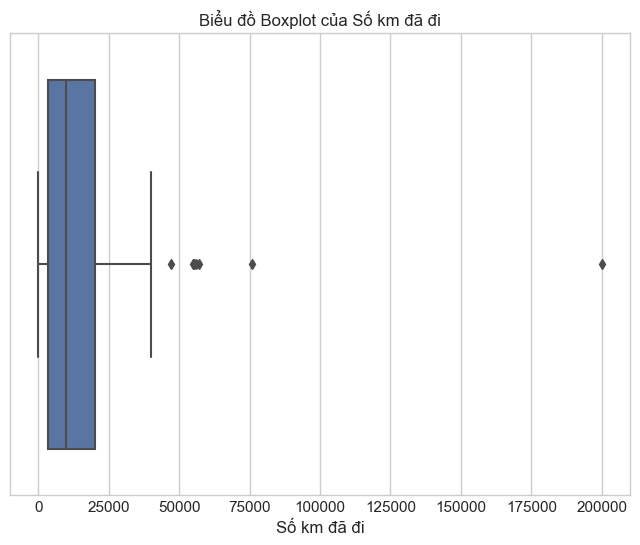

In [27]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='số_km_đã_đi', data=df, orient='vertical')
plt.xlabel('Số km đã đi')
plt.title('Biểu đồ Boxplot của Số km đã đi')
plt.show()

Nhận xét: Phần lớn các xe máy đã đi có số kilomet nằm trong khoảng thấp (từ 0 đến khoảng 50.000 km).
Trung vị nằm gần phân vị thứ nhất hơn là phân vị thứ ba, cho thấy rằng dữ liệu có xu hướng lệch về phía giá trị thấp.Có một số xe máy đã đi một lượng kilomet rất cao, được biểu thị bằng các ngoại lệ trên biểu đồ.

### Tìm hiểu mối quan hệ giữa các biến với giá bán 
1. Biến số

In [28]:
# Tạo một bản sao của dataset để không thay đổi dataset gốc
dataset_numerical = df.copy()

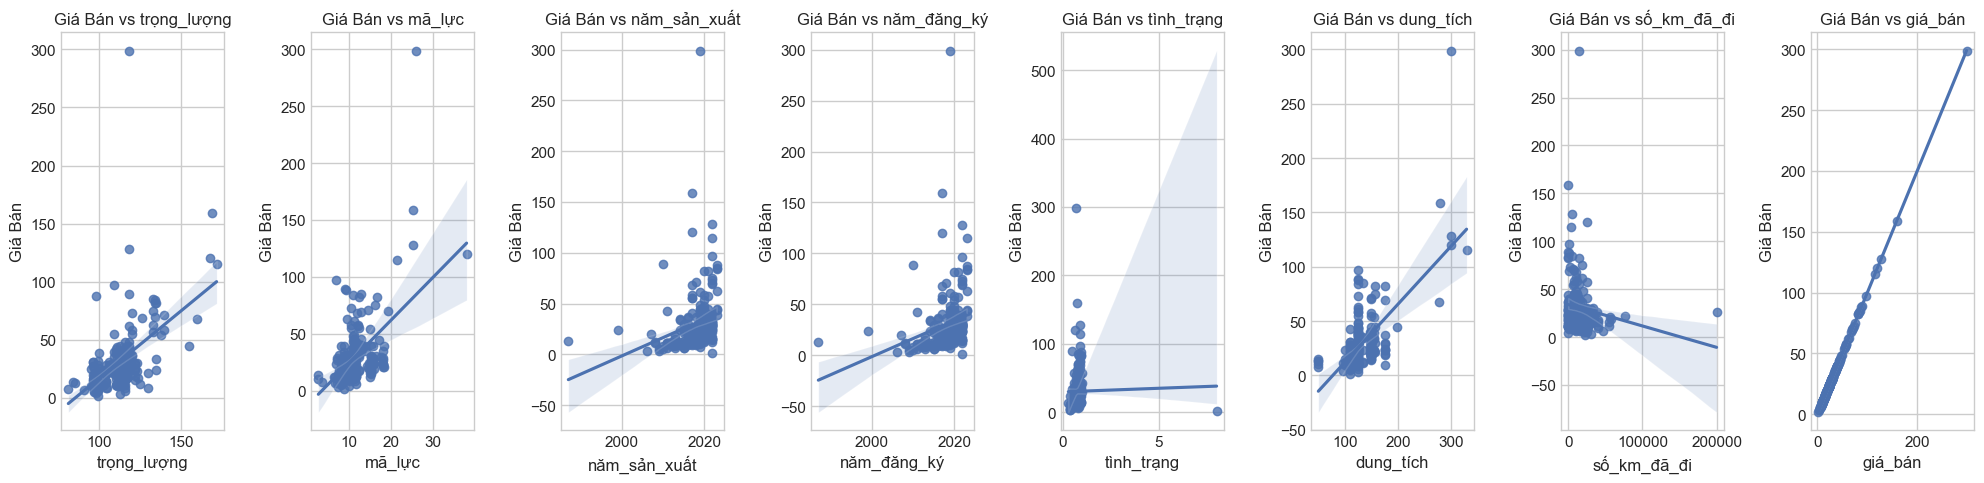

In [29]:
# Danh sách các biến có thể ảnh hưởng đến 'giá_bán'
variables_related_to_price = ['trọng_lượng', 'mã_lực', 'năm_sản_xuất', 'năm_đăng_ký', 'tình_trạng', 'dung_tích', 'số_km_đã_đi', 'giá_bán']

# Tạo một lưới biểu đồ với kích thước phù hợp
num_cols = len(variables_related_to_price) # đếm số lượng biến trong ds
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(20, 5))

# Vẽ từng biểu đồ tương quan nhỏ lại
for i, variable in enumerate(variables_related_to_price):
    sns.regplot(x=variable, y='giá_bán', data=dataset_numerical, ax=axes[i])
    axes[i].set_title(f'Giá Bán vs {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Giá Bán')
    
# Đảm bảo không bị trùng lên nhau
plt.tight_layout()
plt.show()

Nhận xét:
- Giá Bán vs trọng_lượng:Tương quan tương đối mạnh mẽ và dương giữa trọng lượng của xe và giá bán. Điều này có nghĩa là xe có trọng lượng cao hơn thường có giá bán cao hơn.
- Giá Bán vs mã_lực:Tương quan tương đối mạnh mẽ và dương giữa mã lực của xe và giá bán. Điều này có nghĩa là xe có mã lực cao hơn thường có giá bán cao hơn. Tuy nhiên, cũng có một số điểm ngoại lệ với giá bán cao nhưng có mã lực không quá cao.
- Giá Bán vs năm_sản_xuất: Có xu hướng giá bán tăng theo năm sản xuất xe. Xe càng mới thì giá càng cao
- Giá Bán vs dung_tích: Có một mối quan hệ tương đối mạnh giữa dung tích của động cơ và giá bán. Xe với dung tích lớn hơn thường có giá cao hơn, đây là một khuynh hướng phổ biến trong thị trường xe cộ.
- Giá Bán vs năm_đăng_ký: Mối quan hệ giữa năm đăng ký và giá bán có vẻ không rõ ràng như năm sản xuất. Có thể có các yếu tố khác ảnh hưởng đến giá bán ngoài năm đăng ký.

Tóm lại: Biến mã_lực và dung_tích và trọng_lượng có ảnh hưởng nhiều đến giá xe

In [30]:
from scipy.stats import pearsonr
numeric_variables = dataset_numerical[variables_related_to_price]

In [31]:
# Tính toán hệ số tương quan và p-value
correlation_results = pd.DataFrame(columns=['Biến số', 'Hệ số tương quan Pearson', 'P-value'])
for col in numeric_variables.columns:
    correlation, p_value = pearsonr(numeric_variables[col], numeric_variables['giá_bán'])
    correlation_results = correlation_results.append({'Biến số': col, 'Hệ số tương quan Pearson': correlation, 'P-value': p_value}, ignore_index=True)

In [32]:
# Hiển thị kết quả
for index, row in correlation_results.iterrows():
    variable_name = row['Biến số']
    correlation = row['Hệ số tương quan Pearson']
    p_value = row['P-value']
    
    print(f"\nBiến số: {variable_name}")
    print(f"Hệ số tương quan Pearson: {correlation}")
    print(f"P-value: {p_value}")
    
    if abs(correlation) >= 0.8:
        print("Có tương quan mạnh")
    elif abs(correlation) >= 0.5:
        print("Có tương quan vừa")
    elif abs(correlation) >= 0.3:
        print("Có tương quan yếu")
    else:
        print("Không có tương quan")
    
    if p_value < 0.001:
        print("P-value < 0.001: Mạnh")
    elif p_value < 0.05:
        print("P-value < 0.05: Vừa phải")
    elif p_value < 0.1:
        print("P-value < 0.1: Yếu")
    else:
        print("P-value > 0.1: Không có đủ bằng chứng thống kê để kết luận.")
    
    # Nhận xét về ảnh hưởng
    if abs(correlation) >= 0.3 and p_value < 0.1:
        print("Có ảnh hưởng đáng kể đối với giá xe.")
    else:
        print("Không có ảnh hưởng đáng kể đối với giá xe.")



Biến số: trọng_lượng
Hệ số tương quan Pearson: 0.5327242854762035
P-value: 1.8766335719118722e-17
Có tương quan vừa
P-value < 0.001: Mạnh
Có ảnh hưởng đáng kể đối với giá xe.

Biến số: mã_lực
Hệ số tương quan Pearson: 0.5212472657167743
P-value: 1.1796533178967377e-16
Có tương quan vừa
P-value < 0.001: Mạnh
Có ảnh hưởng đáng kể đối với giá xe.

Biến số: năm_sản_xuất
Hệ số tương quan Pearson: 0.26829704859940884
P-value: 5.778090109358668e-05
Không có tương quan
P-value < 0.001: Mạnh
Không có ảnh hưởng đáng kể đối với giá xe.

Biến số: năm_đăng_ký
Hệ số tương quan Pearson: 0.26528530835458974
P-value: 7.042347708644232e-05
Không có tương quan
P-value < 0.001: Mạnh
Không có ảnh hưởng đáng kể đối với giá xe.

Biến số: tình_trạng
Hệ số tương quan Pearson: 0.018529355499286033
P-value: 0.7851118295159932
Không có tương quan
P-value > 0.1: Không có đủ bằng chứng thống kê để kết luận.
Không có ảnh hưởng đáng kể đối với giá xe.

Biến số: dung_tích
Hệ số tương quan Pearson: 0.6504504311182616


##### Tóm lại: Các biến số có ảnh hưởng đáng kể đối với giá xe là: 
 +  trọng_lượng 
 +  mã_lực
 +  dung_tích

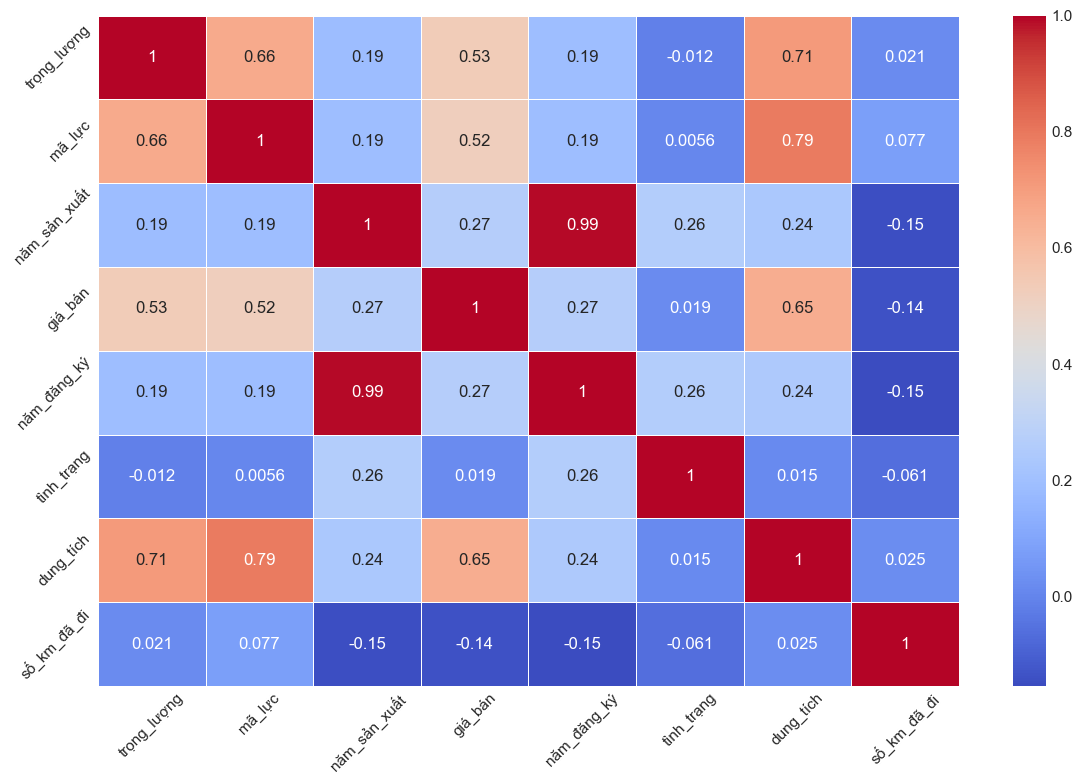

In [33]:
# Ma trận tương quan heatmap giữa các biến dạng số

correlation_matrix = df.corr()

# Thiết lập kích thước cho hình
plt.figure(figsize=(12, 8))

# Vẽ bản đồ nhiệt
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Điều chỉnh giao diện để hiển thị tốt hơn
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Nhận xét: 
+ trọng_lượng vs mã_lực:  Tương quan mạnh và tích cực (0.66), cho thấy xe càng nặng thì càng có khả năng sẽ có mã lực cao hơn.
+ trọng_lượng và dung_tích: Cũng có tương quan mạnh và tích cực (0.71),cho thấy xe càng dung tích càng cao thì càng nặng.
+ mã_lực và dung_tích: Cũng có tương quan mạnh và tích cực (0.79),cho thấy xe càng mã lực càng cao thì dung tích càng lớn.


### Tìm hiểu mối quan hệ giữa các biến với giá bán 
2. Biến phân loại

#### Phân tích đơn biến 
- Thống kê mô tả
- Biểu đồ cột trực quan hóa dữ liệu của từng biến phân loại.

In [34]:
# Các biến phân loại
categorical_columns = ['hãng_xe', 'màu_xe', 'loại_xe', 'xuất_xứ', 'chính_sách_bảo_hành', 'giấy_tờ']

In [35]:
# Thống kê mô tả
descriptive_stats = df[categorical_columns].describe()
descriptive_stats

,hãng_xe,màu_xe,loại_xe,xuất_xứ,chính_sách_bảo_hành,giấy_tờ
count,219,219,219,219,219,219
unique,7,12,3,8,2,2
top,honda,đen,tay ga,việt nam,hãng,chính chủ
freq,133,70,110,120,156,172


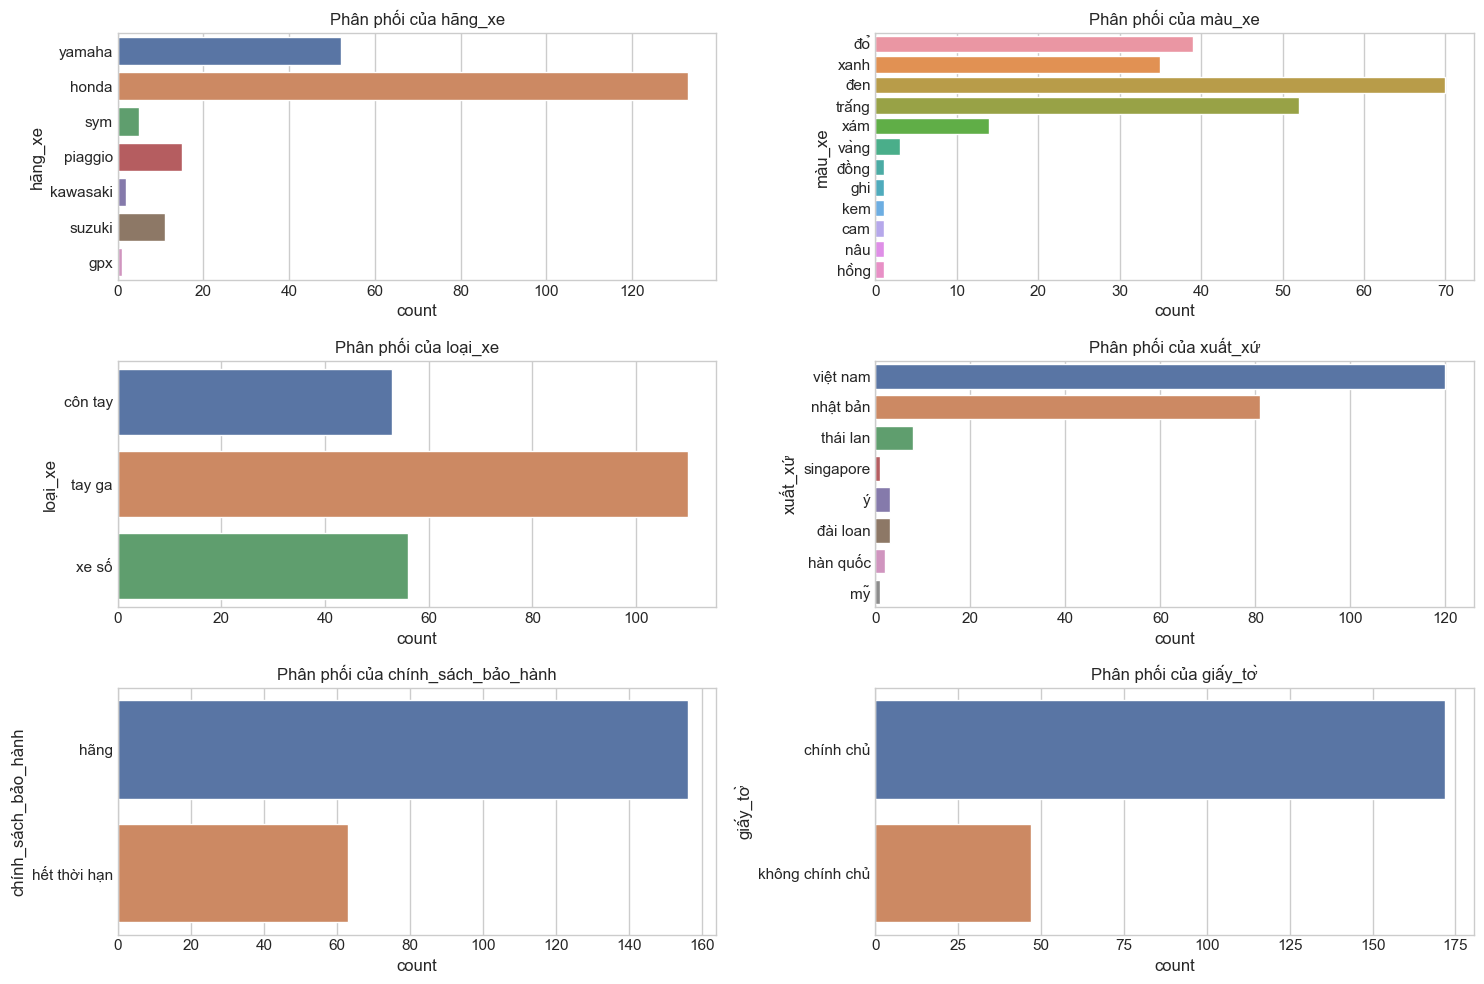

In [36]:
# Vẽ biểu đồ cột
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(y=df[column])
    plt.title(f'Phân phối của {column}')
    plt.tight_layout()

plt.show()

+ Phân phối của hãng xe: Biểu đồ đầu tiên cho thấy Honda và Yamaha là hai hãng xe phổ biến nhất trong dữ liệu, với số lượng xe Honda cao hơn đáng kể so với các hãng khác.

+ Phân phối của loại xe: Xe tay ga là loại xe được giao dịch nhiều nhất, theo sau đó là xe số và côn tay.

+ Phân phối của màu xe: Màu đen và màu trắng là hai màu xe phổ biến nhất, trong khi các màu khác như hồng, nâu, cam, và kem có số lượng ít hơn rất nhiều.

+ Phân phối của xuất xứ: Xe có xuất xứ từ Việt Nam và Nhật Bản chiếm số lượng lớn trong dữ liệu, với xe xuất xứ từ Việt Nam là cao nhất.

+ Phân phối của chính sách bảo hành: Phần lớn xe được bảo hành bởi hãng, chỉ một số ít có chính sách bảo hành hết hạn.

+ Phân phối của giấy tờ: Đa số xe được bán là có giấy tờ chính chủ.

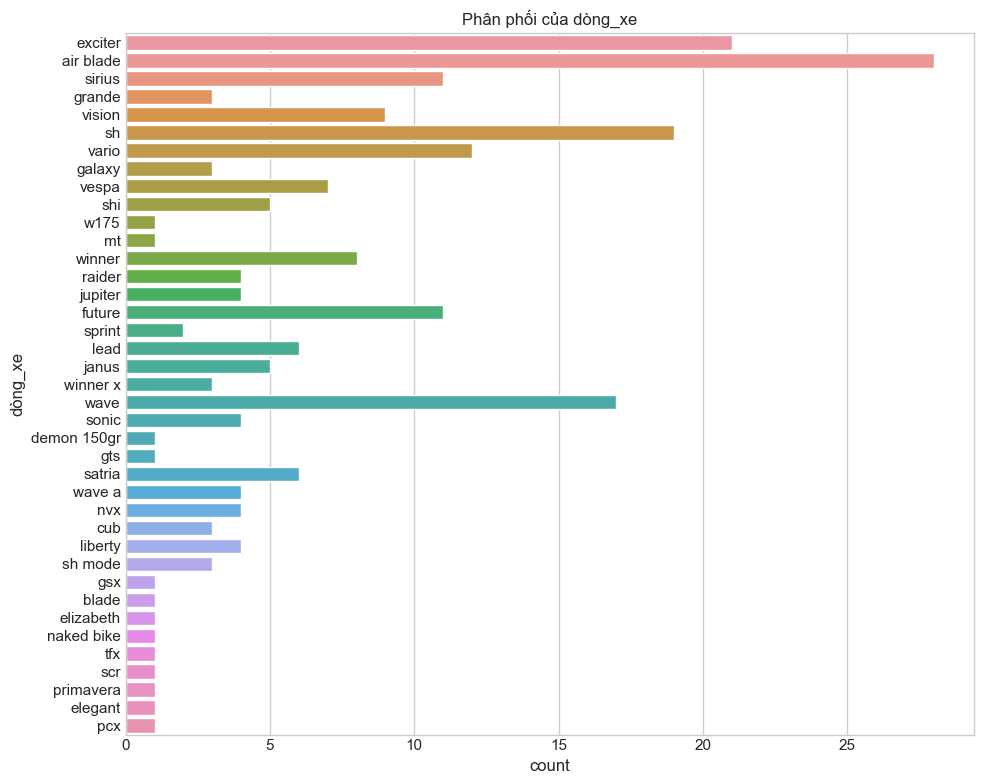

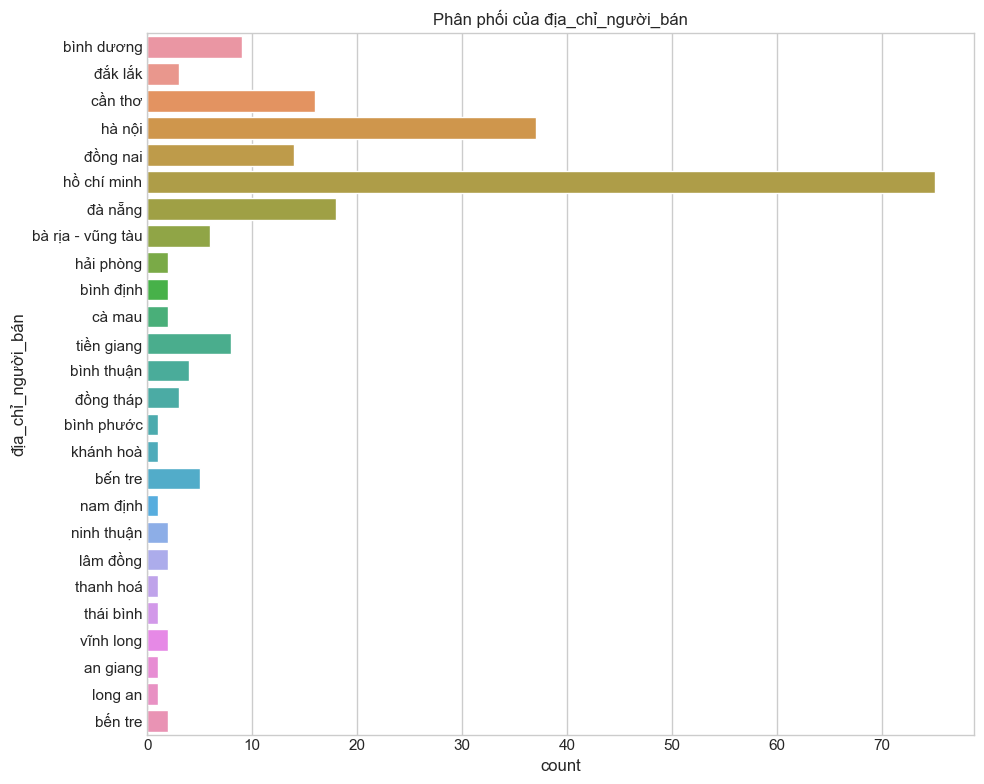

In [37]:
# Vẽ lại cho 2 biến 'dòng_xe' và 'địa_chỉ_người_bán'
# Biểu đồ cho 'dòng_xe'
plt.figure(figsize=(10, 8))
sns.countplot(y=df['dòng_xe'])
plt.title('Phân phối của dòng_xe')
plt.tight_layout()
plt.show()

# Biểu đồ cho 'địa_chỉ_người_bán'
plt.figure(figsize=(10, 8))
sns.countplot(y=df['địa_chỉ_người_bán'])
plt.title('Phân phối của địa_chỉ_người_bán')
plt.tight_layout()
plt.show()

+ Phân phối của địa chỉ người bán: Hà Nội và Hồ Chí Minh là hai địa phương có số lượng xe được bán nhiều nhất theo dữ liệu này.

+ Phân phối của dòng xe: Exciter và Air Blade là hai dòng xe phổ biến nhất. Có sự đa dạng trong các dòng xe khác nhưng với số lượng ít hơn.

#### Phân tích đa biến 
- Phân tích ANOVA
- Biểu đồ box plot

In [38]:
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,yamaha,117.0,15.4,đỏ,2018,exciter,côn tay,Yamaha Exciter 2018,16.8,2018,0.70,150.0,việt nam,30000.0,hãng,chính chủ,bình dương
1,honda,110.0,11.6,xanh,2018,air blade,tay ga,Honda Air Blade 2018,26.5,2018,0.60,125.0,nhật bản,7979.0,hãng,chính chủ,đắk lắk
2,yamaha,99.0,8.8,đen,2018,sirius,xe số,Yamaha Sirius 2018,9.8,2018,0.60,115.0,việt nam,20000.0,hãng,chính chủ,cần thơ
3,yamaha,99.0,8.1,xanh,2016,grande,tay ga,Yamaha Grande 2016,19.5,2016,0.60,125.0,việt nam,20000.0,hãng,chính chủ,hà nội
4,honda,97.0,8.8,trắng,2020,vision,tay ga,Honda Vision Smarkey 2020,25.5,2020,0.85,110.0,việt nam,10000.0,hãng,chính chủ,hà nội


In [39]:
# Phân tích ANOVA
from scipy.stats import f_oneway

biến_phân_loại = ['hãng_xe', 'màu_xe', 'loại_xe', 'xuất_xứ', 
                  'chính_sách_bảo_hành', 'giấy_tờ', 'dòng_xe', 
                  'địa_chỉ_người_bán']
biến_phụ_thuộc = 'giá_bán'

# Tạo một từ điển trống để lưu kết quả ANOVA và nhận xét
ket_qua_anova = {}

# Lặp qua từng biến phân loại
for column in biến_phân_loại:
    cac_nhom = [df[biến_phụ_thuộc][df[column] == category] for category in df[column].unique()]
    f_statistic, p_value = f_oneway(*cac_nhom)

    # Lưu kết quả ANOVA
    ket_qua_anova[column] = {'F-statistic': f_statistic, 'p-value': p_value}
    
    # Thêm nhận xét
    if p_value < 0.05:
        ket_qua_anova[column]['Nhận xét'] = f"Có ảnh hưởng đáng kể đối với {biến_phụ_thuộc}"
    else:
        ket_qua_anova[column]['Nhận xét'] = f"Không có ảnh hưởng đáng kể đối với {biến_phụ_thuộc}"

# Hiển thị kết quả
for column, result in ket_qua_anova.items():
    print(f"\nKết quả ANOVA của {column}:\n{result}")



Kết quả ANOVA của hãng_xe:
{'F-statistic': 3.560550697917085, 'p-value': 0.0022145969453149844, 'Nhận xét': 'Có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của màu_xe:
{'F-statistic': 0.477626324365862, 'p-value': 0.915755621390136, 'Nhận xét': 'Không có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của loại_xe:
{'F-statistic': 11.248558274278505, 'p-value': 2.253340318137963e-05, 'Nhận xét': 'Có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của xuất_xứ:
{'F-statistic': 17.743656433945336, 'p-value': 1.9289117191558666e-18, 'Nhận xét': 'Có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của chính_sách_bảo_hành:
{'F-statistic': 8.894368653620296, 'p-value': 0.003187471418376822, 'Nhận xét': 'Có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của giấy_tờ:
{'F-statistic': 2.2381757247724643, 'p-value': 0.1360926926075196, 'Nhận xét': 'Không có ảnh hưởng đáng kể đối với giá_bán'}

Kết quả ANOVA của dòng_xe:
{'F-statistic': 8.080049972358491, 'p-value': 4.828235261

- Hãng Xe (hãng_xe): F-test = 3.56, p-value = 0.0022
    * F-test khá cao và p-value nhỏ (dưới 0.05) cho thấy có mối quan hệ thống kê có ý nghĩa giữa hãng xe và giá xe. Điều này có nghĩa là các hãng xe khác nhau có thể ảnh hưởng đáng kể đến giá xe máy.
- Màu Xe (màu_xe): F-test = 0.478, p-value = 0.9158
    * F-test thấp và p-value cao (trên 0.05) chỉ ra rằng không có sự khác biệt đáng kể về giá xe máy dựa trên màu sắc. Có thể kết luận rằng màu xe không ảnh hưởng nhiều đến giá.
- Loại Xe (loại_xe): F-test = 11.25, p-value = 0.0000225
    * F-test rất cao và p-value rất thấp, cho thấy có mối quan hệ mạnh mẽ giữa loại xe và giá xe. Có nghĩa là loại xe (ví dụ: tay ga, xe số) là một yếu tố quan trọng ảnh hưởng đến giá xe máy.
   #### Nhìn chung, kết quả cho thấy "hãng xe" và "loại xe" có ảnh hưởng đáng kể đến giá xe máy, trong khi "màu xe" không có ảnh hưởng đáng kể. 

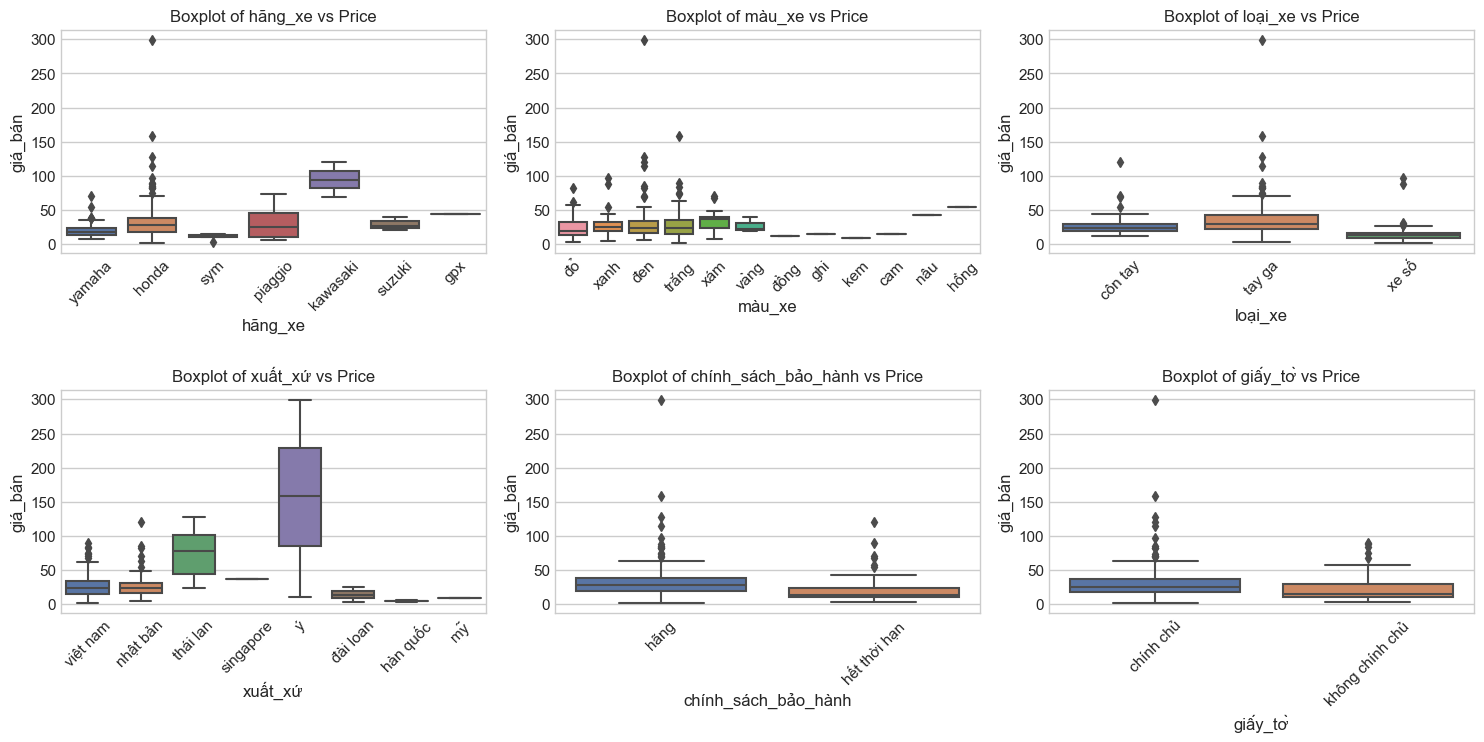

In [40]:
# Biểu đồ Boxplot cho mỗi biến phân loại so với giá xe
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column], y=df['giá_bán'])
    plt.title(f'Boxplot of {column} vs Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

##### Nhận xét:
- hãng_xe: Có vẻ như giá xe khác nhau giữa các hãng. Yamaha, Honda, và SYM có sự phân bố giá tương tự nhau nhưng Piaggio, Kawasaki, và GPX có giá cao hơn đáng kể. Điều này phù hợp với kết quả ANOVA, cho thấy hãng xe có ảnh hưởng đến giá.
- màu_xe: Sự biến thiên giá xe giữa các màu không đáng kể. Tất cả các màu xe đều có các giá trị median gần nhau và các outliers không nhiều, điều này phù hợp với kết quả ANOVA trước đó rằng màu xe không ảnh hưởng nhiều đến giá.
- loại_xe: Có sự phân biệt rõ ràng giữa các loại xe, với xe tay ga có phạm vi giá cao hơn so với xe côn tay và xe số. Điều này cũng phản ánh kết quả ANOVA,loại xe được xác định là có ảnh hưởng lớn đến giá
- xuất_xứ: Xe máy từ Ý có giá cao hơn nhiều so với các nước khác. Xe máy từ Việt Nam, Nhật Bản, và Đài Loan có giá trung bình tương tự nhau và thấp hơn. Điều này có thể chỉ ra rằng xuất xứ có thể là một yếu tố quan trọng ảnh hưởng đến giá, mặc dù kết quả ANOVA trước đó không thể đánh giá được biến này.
- chính_sách_bảo_hành: Có vẻ như xe có chính sách bảo hành từ hãng có phân bố giá cao hơn một chút so với xe không có hoặc không rõ chính sách bảo hành. Tuy nhiên, sự khác biệt không đáng kể 
- giấy_tờ: Xe có giấy tờ chinh chủ có xu hướng có giá cao hơn so với xe không có. Điều này cho thấy giấy tờ có thể ảnh hưởng đến quyết định giá cả

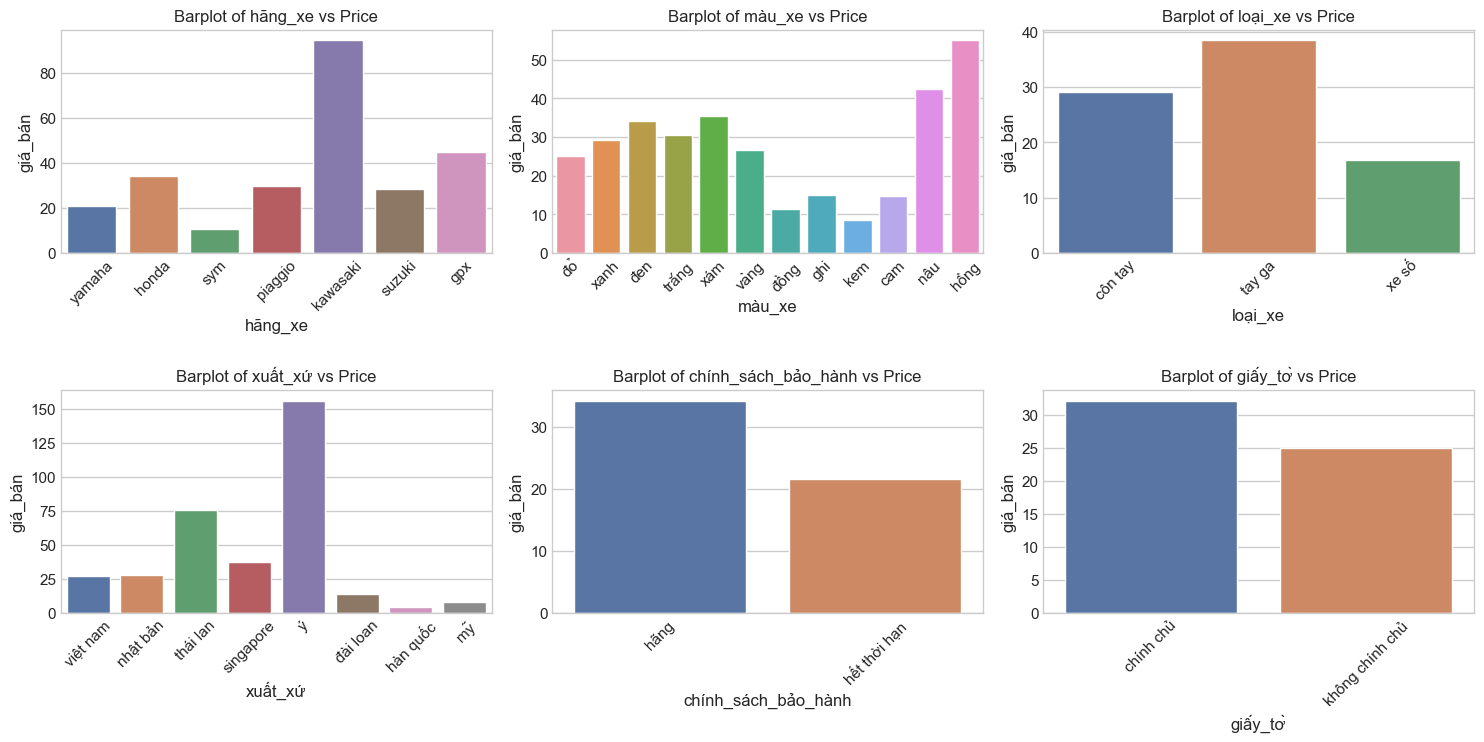

In [41]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df[column], y=df['giá_bán'], ci=None)  # ci=None để vẽ đỉnh và đáy của cột
    plt.title(f'Barplot of {column} vs Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

##### Tóm lại: Các biến phân loại  có ảnh hưởng đáng kể đối với giá xe là: 
 +  hãng_xe
 +  loại_xe
 +  xuất_xứ
 +  chính_sách_bảo_hành
 +  dòng_xe

### DASHBOARD - Thể hiện sự ảnh hưởng của các biến có ảnh hưởng đến giá  tìm được 

In [42]:
import plotly.express as px

# Tạo biểu đồ mẫu dựa trên các biến đã cho
def create_plotly_charts(df):
    # Dictionary để lưu trữ các biểu đồ
    charts = {}

     # 1. Biểu đồ phân tán giữa mã lực và giá bán
    charts['horsepower_price'] = px.scatter(df, x='mã_lực', y='giá_bán', color='hãng_xe',
                                            title='Mã lực so với Giá bán', labels={'mã_lực': 'Mã Lực', 'giá_bán': 'Giá Bán'})

    # 2. Biểu đồ phân tán giữa dung tích và giá bán
    charts['capacity_price'] = px.scatter(df, x='dung_tích', y='giá_bán', color='hãng_xe',
                                          title='Dung tích so với Giá bán', labels={'dung_tích': 'Dung Tích', 'giá_bán': 'Giá Bán'})

    # 3. Biểu đồ phân tán giữa năm sản xuất và giá bán
    charts['year_price'] = px.scatter(df, x='năm_sản_xuất', y='giá_bán', color='hãng_xe',
                                      title='Năm sản xuất so với Giá bán', labels={'năm_sản_xuất': 'Năm Sản Xuất', 'giá_bán': 'Giá Bán'})

    # 4. Biểu đồ cột thể hiện giá bán trung bình theo hãng xe
    avg_price_by_brand = df.groupby('hãng_xe')['giá_bán'].mean().reset_index()
    charts['avg_price_by_brand'] = px.bar(avg_price_by_brand, x='hãng_xe', y='giá_bán',
                                          title='Giá bán trung bình theo Hãng xe', labels={'hãng_xe': 'Hãng Xe', 'giá_bán': 'Giá Bán Trung Bình'})

    # 5. Biểu đồ cột thể hiện giá bán trung bình theo loại xe
    avg_price_by_type = df.groupby('loại_xe')['giá_bán'].mean().reset_index()
    charts['avg_price_by_type'] = px.bar(avg_price_by_type, x='loại_xe', y='giá_bán',
                                         title='Giá bán trung bình theo Loại xe', labels={'loại_xe': 'Loại Xe', 'giá_bán': 'Giá Bán Trung Bình'})

    # 6. Biểu đồ cột thể hiện giá bán trung bình theo màu xe
    avg_price_by_color = df.groupby('màu_xe')['giá_bán'].mean().reset_index()
    charts['avg_price_by_color'] = px.bar(avg_price_by_color, x='màu_xe', y='giá_bán',
                                          title='Giá bán trung bình theo Màu xe', labels={'màu_xe': 'Màu Xe', 'giá_bán': 'Giá Bán Trung Bình'})

    # 7. Biểu đồ đường thể hiện xu hướng giá bán theo năm sản xuất
    line_data = df.groupby('năm_sản_xuất')['giá_bán'].mean().reset_index()
    charts['trend_price_by_year'] = px.line(line_data, x='năm_sản_xuất', y='giá_bán',
                                        title='Xu hướng giá bán theo Năm sản xuất', labels={'năm_sản_xuất': 'Năm Sản Xuất', 'giá_bán': 'Giá Bán'})

    # 8. Biểu đồ hộp thể hiện phân phối giá bán theo hãng xe
    charts['box_price_by_brand'] = px.box(df, x='hãng_xe', y='giá_bán',
                                          title='Phân phối giá bán theo Hãng xe', labels={'hãng_xe': 'Hãng Xe', 'giá_bán': 'Giá Bán'})

    # 9. Biểu đồ tròn thể hiện tỉ lệ các loại xe trong dataset
    pie_data = df['loại_xe'].value_counts()
    charts['pie_chart'] = px.pie(pie_data, labels=pie_data.index, title='Tỉ lệ các loại xe trong dataset')
    
    return charts

# Gọi hàm để tạo biểu đồ
charts = create_plotly_charts(df)


In [43]:
# Cài đặt Dash và dash-bootstrap-components trong Jupyter Notebook
!pip install dash dash-bootstrap-components

In [44]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# Khởi tạo ứng dụng Dash với Bootstrap
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

# Tạo layout cho dashboard
app.layout = html.Div([
    html.H1("Dashboard Dự đoán Giá Xe Máy Cũ"),

    # Sử dụng Rows và Cols để sắp xếp các biểu đồ
    dbc.Row([
        dbc.Col(dcc.Graph(id='horsepower_price', figure=charts['horsepower_price']), width=6),
        dbc.Col(dcc.Graph(id='capacity_price', figure=charts['capacity_price']), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='avg_price_by_brand', figure=charts['avg_price_by_brand']), width=6),
        dbc.Col(dcc.Graph(id='trend_price_by_year', figure=charts['trend_price_by_year']), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='box_price_by_brand', figure=charts['box_price_by_brand']), width=6),
        dbc.Col(dcc.Graph(id='avg_price_by_type', figure=charts['avg_price_by_type']), width=6),
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id='avg_price_by_color', figure=charts['avg_price_by_color']), width=6),
        dbc.Col(dcc.Graph(id='pie_chart', figure=charts['pie_chart']), width=6),
    ])
])

# Khởi chạy ứng dụng
if __name__ == '__main__':
    app.run_server(debug=True)


In [45]:
df.head()

,hãng_xe,trọng_lượng,mã_lực,màu_xe,năm_sản_xuất,dòng_xe,loại_xe,tên_xe,giá_bán,năm_đăng_ký,tình_trạng,dung_tích,xuất_xứ,số_km_đã_đi,chính_sách_bảo_hành,giấy_tờ,địa_chỉ_người_bán
0,yamaha,117.0,15.4,đỏ,2018,exciter,côn tay,Yamaha Exciter 2018,16.8,2018,0.70,150.0,việt nam,30000.0,hãng,chính chủ,bình dương
1,honda,110.0,11.6,xanh,2018,air blade,tay ga,Honda Air Blade 2018,26.5,2018,0.60,125.0,nhật bản,7979.0,hãng,chính chủ,đắk lắk
2,yamaha,99.0,8.8,đen,2018,sirius,xe số,Yamaha Sirius 2018,9.8,2018,0.60,115.0,việt nam,20000.0,hãng,chính chủ,cần thơ
3,yamaha,99.0,8.1,xanh,2016,grande,tay ga,Yamaha Grande 2016,19.5,2016,0.60,125.0,việt nam,20000.0,hãng,chính chủ,hà nội
4,honda,97.0,8.8,trắng,2020,vision,tay ga,Honda Vision Smarkey 2020,25.5,2020,0.85,110.0,việt nam,10000.0,hãng,chính chủ,hà nội


# 3. XÂY DỰNG MÔ HÌNH

1. Chuẩn hóa df --> Chỉ lấy 8 cột 
Biến phân loại --> Encode và Scale
2.  Data Splitting
3. Model Linear --> Đa thức ( Đa biến )
4. Đánh giá kết quả ( MSE và R2, vẽ các biểu đồ)
5. Thực nghiệm tập test 
6. Demo --> nhập vào biến ngẫu nhiên ra kết quả price

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

#### Encode và Scale


In [47]:
# Xác định các biến phân loại và số
categorical_cols = ['hãng_xe', 'loại_xe', 'xuất_xứ', 'dòng_xe', 'chính_sách_bảo_hành']
numerical_cols = ['dung_tích', 'mã_lực', 'trọng_lượng']
target_col = 'giá_bán'

#### Data Splitting

In [48]:
X = df.drop(target_col, axis=1)
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

#### Building Model

In [49]:
from sklearn.linear_model import LinearRegression

# Lấy feature names từ DataFrame
feature_names = X_train.columns

# Xây dựng Pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Đặt handle_unknown thành 'ignore' để bỏ qua các hạng mục không xác định

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Sử dụng Linear Regression làm mô hình cuối cùng
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Huấn luyện pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['dung_tích', 'mã_lực',
                                                   'trọng_lượng']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['hãng_xe', 'loại_xe',
                                                   'xuất_xứ', 'dòng_xe',
                                                   'chính_sách_bảo_hành'])])),
                ('model', LinearRegression())])

In [ ]:
# Dự đoán và đánh giá
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Xây dựng mô hình đa thức

In [59]:
from sklearn.preprocessing import PolynomialFeatures

# Tạo transformer cho biến phân loại
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Tạo transformer cho biến số
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Tạo preprocessor cho ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)])

# Tạo pipeline cho mô hình hồi quy đa thức
model_dathuc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2)),  # Đặt bậc của đa thức
    ('regressor', LinearRegression())])

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_dathuc.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model_dathuc.predict(X_test)

In [60]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r23 = r2_score(y_test, y_pred)
print(f'R2 score: {r23}')

Mean Squared Error: 131799.507187576
R2 score: -145.4097516805275


In [61]:
# Assume df is your DataFrame containing the data

categorical_cols1 = ['hãng_xe', 'loại_xe', 'xuất_xứ', 'dòng_xe', 'chính_sách_bảo_hành']
numerical_cols1 = ['dung_tích', 'mã_lực', 'trọng_lượng']
target_col1 = 'giá_bán'

X = df.drop(target_col1, axis=1)
y = df[target_col1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# Tạo transformer cho biến phân loại
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Tạo transformer cho biến số
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Tạo preprocessor cho ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols1),
        ('num', numerical_transformer, numerical_cols1)
    ])

# Tạo pipeline cho mô hình hồi quy đa thức bậc 3
model_dathuc3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=3)), 
    ('regressor', LinearRegression())
])

# Huấn luyện mô hình trên dữ liệu huấn luyện
model_dathuc3.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model_dathuc3.predict(X_test)

In [62]:
# Đánh giá mô hình
mse3 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r3 = r2_score(y_test, y_pred)
print(f'R2 score: {r3}')

Mean Squared Error: 131799.507187576
R2 score: -590.6600381404836


#### Evaluation 

In [55]:
print(f"MSE: {mse}, R2: {r2}")


MSE: 281.96738969637784, R2: 0.6867759494070043


In [ ]:
# Sử dụng Cross-Validation
from sklearn.model_selection import cross_val_score

# Sử dụng pipeline mà bạn đã xây dựng trước đó
# Giả sử 'pipeline' là pipeline chứa các bước tiền xử lý và mô hình hồi quy của bạn

# Thực hiện cross-validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

# MSE thường là số âm trong scikit-learn vì nó là "cost function" mà chúng ta muốn giảm
# Chuyển đổi về giá trị dương để diễn giải dễ dàng hơn
mse_scores = -scores

print("Mean Squared Error for each fold: ", mse_scores)
print("Average Mean Squared Error: ", mse_scores.mean())


In [ ]:
# Tính tỷ lệ xe máy cho giá thực tế và giá dự đoán
proportion_actual = y_test.value_counts(normalize=True)
proportion_predict = pd.Series(y_pred).value_counts(normalize=True)

# Vẽ Distribution Plot với trục hoành là price và trục tung là proportion of bikes
plt.figure(figsize=(12, 6))
sns.histplot(x=y_test, kde=True, color='blue', label='Actual Value', stat='probability')
sns.histplot(x=y_pred, kde=True, color='orange', label='Predicted Value', stat='probability')
plt.xlabel('Giá (Price)')
plt.ylabel('Tỷ Lệ Xe Máy (Proportion of Bikes)')
plt.title('Distribution Plot of Price with Proportion of Bikes (Actual vs. Predicted)')
plt.legend()
plt.show()

In [ ]:
# Lấy các hệ số từ mô hình LinearRegression
coefficients = pipeline.named_steps['model'].coef_

# In các hệ số với tên biến tương ứng
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

#### Công thức dự đoán

In [ ]:
# Lấy các tên biến sau khi đã mã hóa
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Kết hợp tên biến đã mã hóa và biến số
all_feature_names = np.concatenate((numerical_cols, encoded_feature_names), axis=0)

# Lấy hệ số và điểm chặn
coefficients = pipeline.named_steps['model'].coef_
intercept = pipeline.named_steps['model'].intercept_

# Xây dựng công thức dự đoán
print("Công thức dự đoán giá xe máy cũ:")
print("Giá = ", end='')
print(f"{intercept}", end='')
for feature_name, coef in zip(all_feature_names, coefficients):
    print(f" + ({coef}) * {feature_name}", end='')

# Dự đoán và đánh giá
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse}, R2: {r2}")


#### Demo

In [ ]:
# Chọn một bản ghi ngẫu nhiên từ DataFrame để làm ví dụ dự đoán
sample_record = df.sample(random_state=90)
sample_record_input = sample_record[categorical_cols + numerical_cols]

# Hiển thị bản ghi ngẫu nhiên
print("Bản ghi ngẫu nhiên:")
for column, value in sample_record_input.iloc[0].items():
    print(f"{column}: {value}")

# Thực hiện dự đoán sử dụng mô hình đã huấn luyện
sample_predicted_price = pipeline.predict(sample_record_input)

# Hiển thị giá dự đoán
print("\nGiá dự đoán:")
print(f"{sample_predicted_price[0]:,.2f} VND")




In [ ]:
# Lấy chỉ số của bản ghi ngẫu nhiên
sample_record_index = sample_record.index[0]

# Hiển thị chỉ số của bản ghi ngẫu nhiên
print(f"Bản ghi ngẫu nhiên này nằm ở dòng số {sample_record_index} trong DataFrame.")

In [ ]:
# Lấy bản ghi có chỉ số 130 để so sánh KQ
record = df.loc[205]

# Hiển thị bản ghi
print(record)

#### Tinh chỉnh mô hình

#### Xử lý Outliers sử dụng IQR (Interquartile Range)

In [ ]:
Q1 = df['giá_bán'].quantile(0.25)
Q3 = df['giá_bán'].quantile(0.75)
IQR = Q3 - Q1

# Định nghĩa các giới hạn để xác định outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc dữ liệu để loại bỏ outliers
df_filtered = df[(df['giá_bán'] >= lower_bound) & (df['giá_bán'] <= upper_bound)]

In [ ]:
X = df_filtered.drop(target_col, axis=1)
y = df_filtered[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
from sklearn.linear_model import LinearRegression

# Lấy feature names từ DataFrame
feature_names = X_train.columns

# Xây dựng Pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # Đặt handle_unknown thành 'ignore' để bỏ qua các hạng mục không xác định

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Sử dụng Linear Regression làm mô hình cuối cùng
pipeline_improve = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Huấn luyện pipeline
pipeline_improve.fit(X_train, y_train)

# Lấy các hệ số từ mô hình Ridge
coefficients = pipeline.named_steps['model'].coef_

# In các hệ số với tên biến tương ứng
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

In [ ]:
# Dự đoán và đánh giá
y_pred = pipeline_improve.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MSE: {mse}, R2: {r2}")

In [ ]:
# Tính tỷ lệ xe máy cho giá thực tế và giá dự đoán
proportion_actual = y_test.value_counts(normalize=True)
proportion_predict = pd.Series(y_pred).value_counts(normalize=True)

# Vẽ Distribution Plot với trục hoành là price và trục tung là proportion of bikes
plt.figure(figsize=(12, 6))
sns.histplot(x=y_test, kde=True, color='blue', label='Actual Value', stat='probability')
sns.histplot(x=y_pred, kde=True, color='orange', label='Predicted Value', stat='probability')
plt.xlabel('Giá (Price)')
plt.ylabel('Tỷ Lệ Xe Máy (Proportion of Bikes)')
plt.title('Distribution Plot of Price with Proportion of Bikes (Actual vs. Predicted)')
plt.legend()
plt.show()

In [ ]:
# Sử dụng Cross-Validation
from sklearn.model_selection import cross_val_score

# Sử dụng pipeline mà bạn đã xây dựng trước đó
# Giả sử 'pipeline' là pipeline chứa các bước tiền xử lý và mô hình hồi quy của bạn

# Thực hiện cross-validation
scores_improve = cross_val_score(pipeline_improve, X, y, cv=5, scoring='neg_mean_squared_error')

# MSE thường là số âm trong scikit-learn vì nó là "cost function" mà chúng ta muốn giảm
# Chuyển đổi về giá trị dương để diễn giải dễ dàng hơn
mse_scores_improve = -scores_improve

print("Mean Squared Error for each fold: ", mse_scores_improve)
print("Average Mean Squared Error: ", mse_scores_improve.mean())


#### Demo sau khi tinh chỉnh

In [ ]:
# Chọn một bản ghi ngẫu nhiên từ DataFrame để làm ví dụ dự đoán
sample_record = df.sample(random_state=10)
sample_record_input = sample_record[categorical_cols + numerical_cols]

# Hiển thị bản ghi ngẫu nhiên
print("Bản ghi ngẫu nhiên:")
for column, value in sample_record_input.iloc[0].items():
    print(f"{column}: {value}")

# Thực hiện dự đoán sử dụng mô hình đã huấn luyện
sample_predicted_price = pipeline_improve.predict(sample_record_input)

# Hiển thị giá dự đoán
print("\nGiá dự đoán:")
print(f"{sample_predicted_price[0]:,.2f} VND")

In [ ]:
# Lấy chỉ số của bản ghi ngẫu nhiên
sample_record_index = sample_record.index[0]

# Hiển thị chỉ số của bản ghi ngẫu nhiên
print(f"Bản ghi ngẫu nhiên này nằm ở dòng số {sample_record_index} trong DataFrame.")

In [ ]:
# Lấy bản ghi có chỉ số  để so sánh KQ
record = df.loc[35]

# Hiển thị bản ghi
print(record)

# 4. Trực quan dữ liệu địa lí
Trực quan dữ liệu địa lí của biến địa_chỉ_người_bán

In [ ]:
df['địa_chỉ_người_bán'].unique()

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
# Tạo một bản đồ với toạ độ trung tâm Việt Nam 
vietnam_map = folium.Map(location=[14.0583, 108.2772], zoom_start=5)

#  tọa độ của các tỉnh trong danh sách
tinh_coords = {
    'Bến Tre': [10.2284, 106.3755],
    'Bình Định': [13.7822, 109.219],
    'Bình Dương': [11.1661, 106.6740],
    'Bình Phước': [11.7500, 106.6667],
    'Bình Thuận': [10.9335, 108.1009],
    'Cà Mau': [9.1768, 105.1524],
    'Cần Thơ': [10.0316, 105.7842],
    'Đà Nẵng': [16.0544, 108.2022],
    'Đắk Lắk': [12.6944, 108.2785],
    'Đồng Nai': [11.0435, 107.3074],
    'Đồng Tháp': [10.5400, 105.6301],
    'Hà Nội': [21.0285, 105.8542],
    'Hải Phòng': [20.8449, 106.6881],
    'Hồ Chí Minh': [10.7769, 106.7009],
    'Khánh Hoà': [12.2388, 109.1967],
    'Lâm Đồng': [11.9455, 108.4580],
    'Long An': [10.5410, 106.6784],
    'Nam Định': [20.4286, 106.1761],
    'Ninh Thuận': [11.9692, 108.4467],
    'Thái Bình': [20.4537, 106.3377],
    'Thanh Hoá': [19.8000, 105.7667],
    'Tiền Giang': [10.3556, 106.3750],
    'Vĩnh Long': [10.2538, 105.9725],
    'Bà Rịa - Vũng Tàu':[10.3854, 107.0843]
}

# thêm marker cho mỗi tỉnh
for province, coords in tinh_coords.items():
    lat, lon = coords
    folium.Marker([lat, lon], popup=f"địa_chỉ_người_bán: {province}").add_to(vietnam_map)


vietnam_map
